In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import emd
from statistics import mean
from scipy import signal, ndimage
import math

In [2]:
from scipy import asarray as ar,exp

In [3]:
from scipy.optimize import curve_fit
import matplotlib.patches as ptc
from numpy.polynomial import Polynomial
from astropy.io import fits

In [4]:
import scienceplots
plt.style.use(['science','notebook','grid'])

In [5]:
from scipy.stats import sem

In [6]:
datContent = [i.strip().split() for i in 
              open("../ABDOR/Dat_LC_files/01_0123720201/pn_b50_01_0123720201.dat").readlines()]

In [7]:
datContent = datContent[5:]

In [8]:
t= np.array(datContent)[:,0]
x1= np.array(datContent)[:,1]
e= np.array(datContent)[:,2]

In [9]:
t_,x_,e_=[],[],[]
for i in range(len(t)):
    t_.append(float(t[i]))
    x_.append(float(x1[i]))    
    e_.append(float(e[i]))    

In [10]:
t_ = np.array(t_)
x_ = np.array(x_)
e_ = np.array(e_)

In [11]:
x=x_[400:800][74:]
t1=t_[400:800][74:]

In [12]:
# # FITS files
# hdul = fits.open('../datasets/go1420200104.fits')
# print(hdul.info())
# data= hdul[2].data
# print(data.columns)
# print(data.Flux)

# channel=1
# t1=data.Time[0]
# d1= np.array(data.Flux)
# dt=data.Time[0][2]-data.Time[0][1]
# fs=1/dt
# x0=d1[0][:,channel]
# N= len(x0)

In [13]:
# s,e= None, None
# s,e= 20000,24000
# x0= x0[s:e]
# t1= t1[s:e]

In [14]:
# data.Time[0]

In [15]:
# ##Using pandas dataframe
# df= pd.read_csv('../datasets/inttime_har000_1200km.csv')
# t1=np.array(df['timestamps'])
# wp1=df['ls']
# x=np.array(wp1)



In [16]:
dt= t1[1]-t1[0]
fs= 1/dt

In [17]:
# plt.figure(figsize=(10,3))
# plt.plot(t1,x)
# plt.savefig('original signal')

In [18]:
x= x-mean(x)
x=x/np.sqrt(mean(x**2))

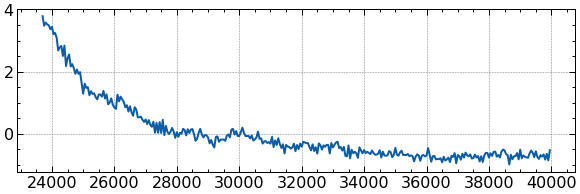

In [19]:
plt.figure(figsize=(10,3))
plt.plot(t1,x)


In [20]:
imfm = emd.sift.mask_sift(x,max_imfs=16)
n_imfm= len(imfm[0,:])

 Inputs samples (326) is small for specified max_imfs (16) very likely that 7 or fewer imfs are returned


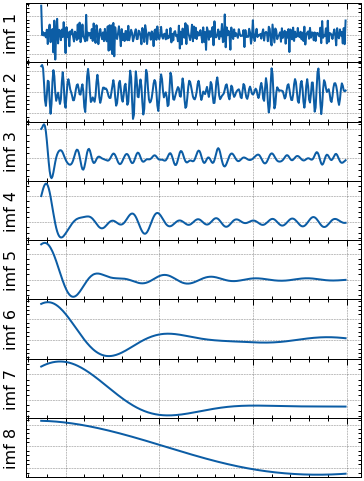

In [21]:
plt.figure(figsize=(6,12))
for i in range(0,len(imfm[0,:])):
    plt.subplot(11,1,i +1)    
    plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)
    plt.ylabel(f'imf {i+1}')
    plt.plot(t1,imfm[:,i])
    plt.subplots_adjust(wspace=0, hspace=0)
    
# plt.subplot(len(imfm[0,:]),1,8)
# plt.plot(t1,imfm[:,10])
# plt.ylabel('imf 13')



In [22]:
# plt.plot(t1,imfm[:,10])

In [23]:
def bm(List):
    mins=[]
    maxs=[]
    for n, i in enumerate(List[1:-1]):
            if List[n] < List[n-1] and List[n] < List[n+1]:
                mins.append(List[n])
            elif List[n] > List[n-1] and i> List[n+1]:
                maxs.append(List[n])
    return len(mins)+len(maxs)

In [24]:
Em=[]
Pm=[]
for i in range(n_imfm):
    E=mean(imfm[:,i]**2)
    P=2*len(imfm[:,i])/bm(imfm[:,i])
    Em.append(E)
    Pm.append(P)
    
Ex=mean(x**2)
Px=2*len(x)/bm(x)

Em=np.array(Em)
Pm=np.array(Pm)

In [25]:
def log_fit(xi,yi,x,deg,col='green'):  
    coefficients = np.polyfit(np.log10(xi), np.log10(yi), deg)
    polynomial = np.poly1d(coefficients)
    log10_y_fit = polynomial(np.log10(x))  # <-- Changed

    L=[]
    L.append(x)
    L.append(10**log10_y_fit)
    return L

In [26]:
def fit(xi,yi,x,deg,col='green'):  
    coefficients = np.polyfit((xi), (yi), deg)
    polynomial = np.poly1d(coefficients)
    log10_y_fit = polynomial((x))  # <-- Changed

    L=[]
    L.append(x)
    L.append(log10_y_fit)
    return L

In [27]:
def spread(x,k,N):
    return x+(k*(math.sqrt(2/N))*(np.e**(x/2))),x-(k*(math.sqrt(2/N))*(np.e**(x/2)))

0.00013827532033201418


/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/1549448056.py:13: RuntimeWarning: invalid value encountered in log10
  L.append(np.log10(l))


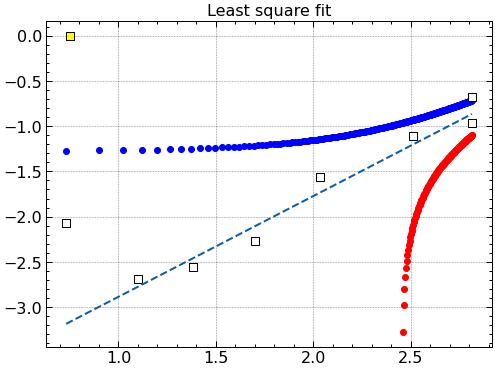

In [28]:
start_imf= 1
end_imf= None

lf= log_fit(Pm[1:-1],Em[1:-1],np.linspace(Pm[0],Pm[-1],250),1)
slope= (lf[1][1]-lf[1][0])/(lf[0][1]-lf[0][0])
print(slope)

plt.title('Least square fit')
plt.plot(np.log10(lf[0]),np.log10(lf[1]),'--')
U,L=[],[]
for i in range(len(lf[0])):
    u,l=spread(lf[1][i],0.675,len(x))
    L.append(np.log10(l))
    U.append(np.log10(u))
plt.scatter(np.log10(lf[0]),U,color='blue')
plt.scatter(np.log10(lf[0]),L,color='red')
plt.scatter(np.log10(Pm),np.log10(Em), marker='s',edgecolor='black',facecolor='white',s=70,linewidth=1)
# plt.scatter(Pm[0],Em[0], marker='s',edgecolor='black',facecolor='lightgreen',s=70,linewidth=1)
plt.scatter(np.log10(Px),np.log10(Ex),c='yellow',edgecolor='black',s=80,marker='s')

# plt.loglog()

/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/4213827629.py:20: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(f),np.log10(L),alpha=.5,c=col[i])
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/4213827629.py:21: RuntimeWarning: invalid value encountered in log10
  plt.fill_between(np.log10(f),np.log10(U),np.log10(L),color=col[i],alpha=.2)
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/4213827629.py:20: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(f),np.log10(L),alpha=.5,c=col[i])
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/4213827629.py:21: RuntimeWarning: invalid value encountered in log10
  plt.fill_between(np.log10(f),np.log10(U),np.log10(L),color=col[i],alpha=.2)
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/4213827629.py:20: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(f),np.log10(L),alpha=.5,c=col[i])
/var/folders

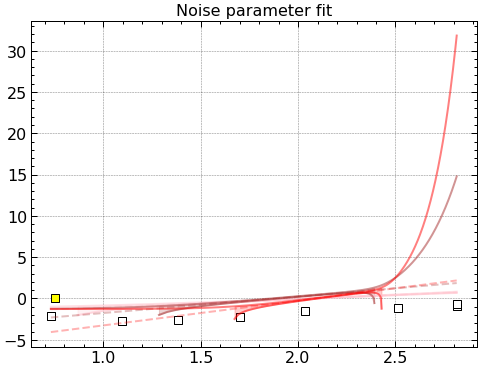

In [29]:
plt.scatter(np.log10(Pm[:]),np.log10(Em[:]), marker='s',edgecolor='black',facecolor='white',s=70,linewidth=1)
plt.scatter(np.log10(Px),np.log10(Ex),c='yellow',edgecolor='black',s=80,marker='s')

A=[-1,-2,-3]
Y0= [-0.8,-2.5,-5.0]
col=['pink','brown','red']
for i in range(3):
    
    C=.055*(10**(Y0[i]))
    
    f= np.linspace(Pm[0],Pm[-1],len(x))
    noise= C/(f**(A[i]))

    U,L=[],[]
    for J in range(len(noise)):
        u,l=spread((noise[J]),0.675,len(noise))
        L.append(l)
        U.append(u)
    plt.plot(np.log10(f),np.log10(U),alpha=.5,c=col[i])
    plt.plot(np.log10(f),np.log10(L),alpha=.5,c=col[i])
    plt.fill_between(np.log10(f),np.log10(U),np.log10(L),color=col[i],alpha=.2)
    plt.title('Noise parameter fit')
    plt.plot(np.log10(f),np.log10(noise),'--',c=col[i],alpha=.3)
    # plt.loglog()


In [30]:
# for i in range(n_imfm):
#     plt.scatter(Pm[i],Em[i],s=50,c='black')

# plt.scatter(Px,Ex,s=70,c='yellow',edgecolor='black')

# noise= log_fit(Pm,Em,1)
# plt.plot(noise[0],noise[1],linestyle='--')
# plt.loglog()

In [31]:
def patch_plot():
    rect = ptc.Rectangle((8, 1e-2), -3.3, 4, linewidth=3, edgecolor='chartreuse',
                             facecolor='none',linestyle='--',alpha=1)
    ax.add_patch(rect)
    plt.annotate('mode mixing',(3,10**-2.5))


/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/3546848141.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/f,(pxx),linewidth=2.5,c='blue')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/3546848141.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/f,(pxx),linewidth=2.5,c='blue')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/3546848141.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/f,(pxx),linewidth=2.5,c='blue')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/3546848141.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/f,(pxx),linewidth=2.5,c='blue')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/3546848141.py:4: RuntimeWarning: divide by zero encountered in divide
  ax.plot(1/f,(pxx),linewidth=2.5,c='blue')
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/3546848141.py:4: RuntimeWarning: divide 

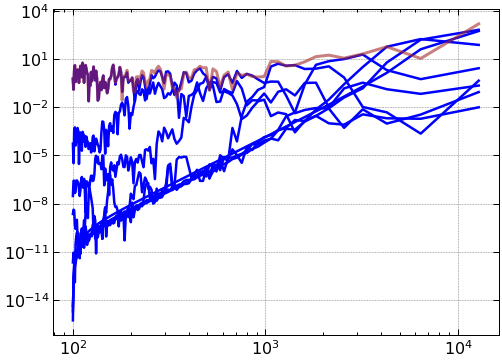

In [32]:
fig, ax = plt.subplots()
for i in range(len(imfm[0,:])):
    f,pxx=sp.signal.welch(imfm[:,i],fs=fs)
    ax.plot(1/f,(pxx),linewidth=2.5,c='blue')

# plt.axvline(x=3.0,linestyle='--',alpha=.7,color='black')
xf, xpxx= sp.signal.welch(x,fs)
ax.plot(1/xf,(xpxx),color='brown',linestyle='-',linewidth=3,alpha=.6)
# plt.xlim(4)
# plt.ylim(1e-16)
ax.loglog()
# plt.legend(['imf{x}'.format(x=i) for i in range(1,6)],fontsize=13)
# plt.show()
# plt.savefig('fourier_imf.jpg')

In [33]:
# IP, IF, IA = emd.spectra.frequency_transform(imfm, fs, 'nht')
# freq_range = (0, .3, 100)
# plt.figure(figsize=(10,10))

# for i in range(5):
#     plt.subplot(5,1,i+1)
#     hht_f, hht = emd.spectra.hilberthuang(IF[:,i], IA[:,i], freq_range, mode='amplitude', sum_time=False)
#     hht = ndimage.gaussian_filter(hht, 10)

#     c=plt.pcolormesh(t1, hht_f, hht, cmap='magma_r')
#     # plt.title('Hilbert-Huang Transform')
#     plt.subplots_adjust( hspace=0)
    
#     # plt.xlabel('Time (min)')
#     plt.xticks([])
#     plt.yticks=((0,.3,.3))
#     # plt.ylabel('Frequency (Hz)')
#     # plt.colorbar(c)
# plt.savefig('hibert.png')

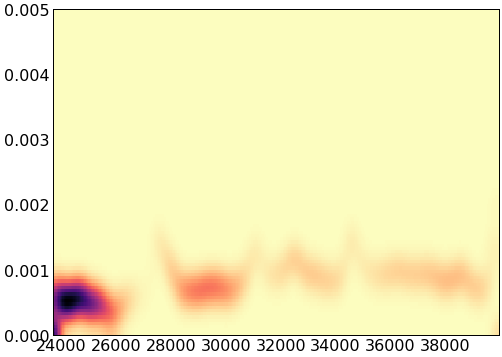

In [34]:
IP, IF, IA = emd.spectra.frequency_transform(imfm, fs, 'nht')
freq_range = (0, .005, 100)
hht_f, hht = emd.spectra.hilberthuang(IF[:,3], IA[:,3], freq_range, mode='amplitude', sum_time=False)
hht = ndimage.gaussian_filter(hht, 4)
plt.grid(False)
c=plt.pcolormesh(t1, hht_f, hht, cmap='magma_r')

# plt.xlim(38000)
# plt.ylim(0,1)

In [35]:
def fourier(sig,sr):
    X = np.fft.fft(sig)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 
    return freq[:N//2], np.abs(X)[:N//2]


In [36]:

# plt.figure(figsize = (12, 6))
# for i in range(5):
#     L= fourier(imfm[:,i],fs)
#     plt.plot(1/L[0], L[1],linewidth=2)
# # L=fourier(imfm[:,0]+imfm[:,1],fs)
# # plt.step(1/L[0], L[1])
# # plt.axvline(x=3,linestyle='--',color='green')
# plt.loglog()


In [37]:

# plt.figure(figsize = (12, 6))
# for i in range(5):
#     fxx, pxx =sp.signal.welch(imfm[:,i],fs,nperseg=len(t1))
#     plt.plot(1/fxx,pxx,c='blue',alpha=1-1/(i+1),linewidth=.5)
# # plt.axvline(x=3,linestyle='--',color='green')
# plt.loglog()

/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/446727084.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.step(1/L[0], L[1])
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/446727084.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.step(1/L[0], L[1])
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/446727084.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.step(1/L[0], L[1])
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/446727084.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.step(1/L[0], L[1])
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/446727084.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.step(1/L[0], L[1])
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/446727084.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.step(1/L[0], L[1])
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn

[]

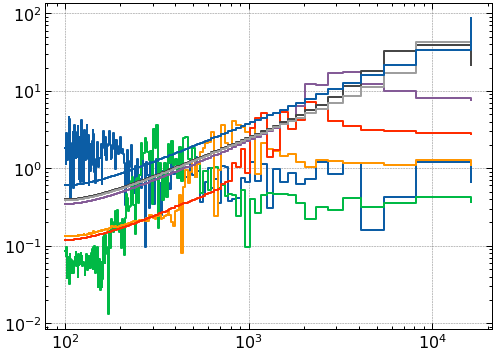

In [38]:
for i in range(len(imfm[0,:])):
    L= fourier(imfm[:,i],fs)
    plt.step(1/L[0], L[1])

# for i in range(3):
#     L_avg=[[],[]]
#     for i in range(len(L[1])-4):
#         L_avg[1].append((L[1][i]+L[1][i+1]+L[1][i+2]+L[1][i+3])/4)
#         L_avg[0].append(L[0][i])


# plt.plot(1/np.array(L_avg[0]), np.array(L_avg[1]))
# L=fourier(imfm[:,0]+imfm[:,1],fs)
# plt.step(1/L[0], L[1])
# plt.axvline(x=3,linestyle='--',color='green')
plt.loglog()

/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/1473720967.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log(1/f1),np.log(pxx1/pxx5))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/1473720967.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log(1/f1),np.log(pxx2/pxx5))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/1473720967.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log(1/f1),np.log(pxx3/pxx5))
/var/folders/gq/8wbg8lhd50b6xp31434c79mh0000gn/T/ipykernel_85982/1473720967.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log(1/f1),np.log(pxx4/pxx5))


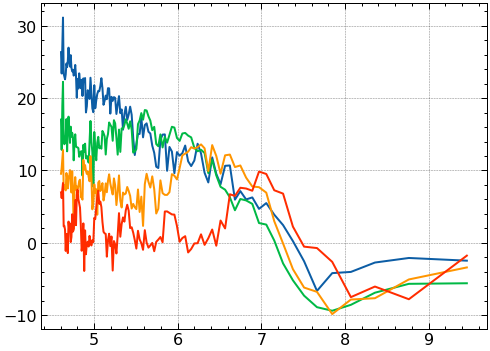

In [39]:

f1,pxx1= sp.signal.welch(imfm[:,0],fs)
f2,pxx2= sp.signal.welch(imfm[:,1],fs)
f3,pxx3= sp.signal.welch(imfm[:,2],fs)
f4,pxx4= sp.signal.welch(imfm[:,3],fs)
f5,pxx5= sp.signal.welch(imfm[:,4],fs)

plt.plot(np.log(1/f1),np.log(pxx1/pxx5))
plt.plot(np.log(1/f1),np.log(pxx2/pxx5))
plt.plot(np.log(1/f1),np.log(pxx3/pxx5))
plt.plot(np.log(1/f1),np.log(pxx4/pxx5))
# plt.plot(np.log(1/f1),np.log(pxx5/pxx5))

# plt.loglog()

In [40]:
np.e**1.25

3.490342957461841

In [41]:
def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

def gaussian(x,y):
    n = len(x)                          #the number of data
    mean = sum(x*y)/n                   #note this correction
    sigma = sum(y*(x-mean)**2)/n      #note this correction
    popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])
    ax = plt.gca()
    ax.plot(x, y, 'r.-')
    ax.plot(x,10**(gaus(x,*popt)),'ro:')
    ax.loglog()

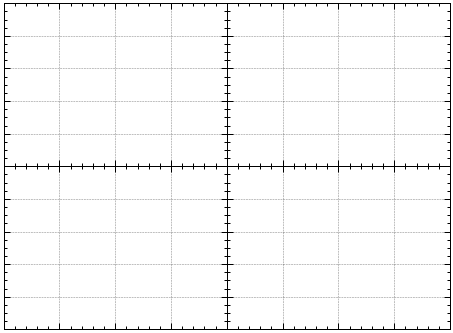

In [42]:
import matplotlib.pyplot as plt

ax = [plt.subplot(2,2,i+1) for i in range(4)]

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

    
plt.subplots_adjust(wspace=0, hspace=0)